### Script Plot Tiltmeter v1.1
#### 1 file data per bulan, format data dalam derajat

In [1]:
import pandas as pd
import os

directory = r'D:\Jupyter Plot\Krakatau\dataold'

stasiun = 'Kras'
gunung = 'Anak Krakatau'

waktu_awal = '30/01/2024' # format dd/mm/yyyy
waktu_akhir = '15/10/2024' # tanggal dan bulan 2 digit, tahun 4 digit
interval_hari = 15

# Mengambil nilai bulan dan tahun
start_year = int(waktu_awal[6:])
start_month = int(waktu_awal[3:5])
end_year = int(waktu_akhir[6:])
end_month = int(waktu_akhir[3:5])

# Proses menggabungkan file-file 
# Nama file harus memiliki format "yyyymm_stasiun.txt", contoh "202401_TiltKras.txt"
merged_data = pd.DataFrame()
files_to_merge = []  
for filename in os.listdir(directory):
    if filename.endswith(".txt"):
        # Membaca nama file        
        try:
            year = int(filename[:4])
            month = int(filename[4:6])
            station = filename[11:15]
        except ValueError:
            # Skip file jika tidak dapat di-parse sebagai angka untuk tahun dan bulan
            continue
        # Memeriksa apakah file cocok dengan kriteria sesuai nama stasiun, waktu awal, dan waktu akhir yang ditentukan sebelumnya
        if (start_year < end_year):
            if ((year == start_year and month >= start_month) or (year == end_year and month <= end_month) or (year > start_year and year < end_year)) and station == stasiun:
                files_to_merge.append(filename)  # Menambahkan nama file ke daftar
                # Membaca file dan menggabungkannya
                filepath = os.path.join(directory, filename)
                data = pd.read_csv(filepath, sep=',', header=None, names=['DateTime', 'TiltX', 'TiltY', 'Temp'])
                merged_data = pd.concat([merged_data, data], ignore_index=True)
        else:
            if (year == start_year and month >= start_month and year == end_year and month <= end_month) and station == stasiun:
                files_to_merge.append(filename)  # Menambahkan nama file ke daftar
                # Membaca file dan menggabungkannya
                filepath = os.path.join(directory, filename)
                data = pd.read_csv(filepath, sep=',', header=None, names=['DateTime', 'TiltX', 'TiltY', 'Temp'])
                merged_data = pd.concat([merged_data, data], ignore_index=True)

if files_to_merge:    
    print("\nFile yang ditemukan : ")
    for item in files_to_merge:
        print(item)
    print("________________________________")
    print("\nData (5 baris pertama dan terakhir :")
    print(merged_data)
else:
    print("\n File yang sesuai tidak berhasil ditemukan")




File yang ditemukan : 
202401_TiltKras.txt
202402_TiltKras.txt
202403_TiltKras.txt
202404_TiltKras.txt
202405_TiltKras.txt
202406_TiltKras.txt
202407_TiltKras.txt
202408_TiltKras.txt
202409_TiltKras.txt
202410_TiltKras.txt
________________________________

Data (5 baris pertama dan terakhir :
                       DateTime     TiltX   TiltY      Temp
0       01-01-2024 00:00:00.000 -0.003500 -0.0034  32.13000
1       01-01-2024 00:01:00.000 -0.003500 -0.0034  32.13000
2       01-01-2024 00:02:00.000 -0.003500 -0.0034  32.12938
3       01-01-2024 00:03:00.000 -0.003500 -0.0034  32.12062
4       01-01-2024 00:04:00.000 -0.003500 -0.0034  32.13063
...                         ...       ...     ...       ...
385597  14-10-2024 16:31:00.000  0.024406 -0.0019  34.05000
385598  14-10-2024 16:32:00.000  0.024500 -0.0019  34.05124
385599  14-10-2024 16:33:00.000  0.024494 -0.0019  34.06876
385600  14-10-2024 16:34:00.000  0.024400 -0.0019  34.04937
385601  14-10-2024 16:35:00.000  0.024406 -0.

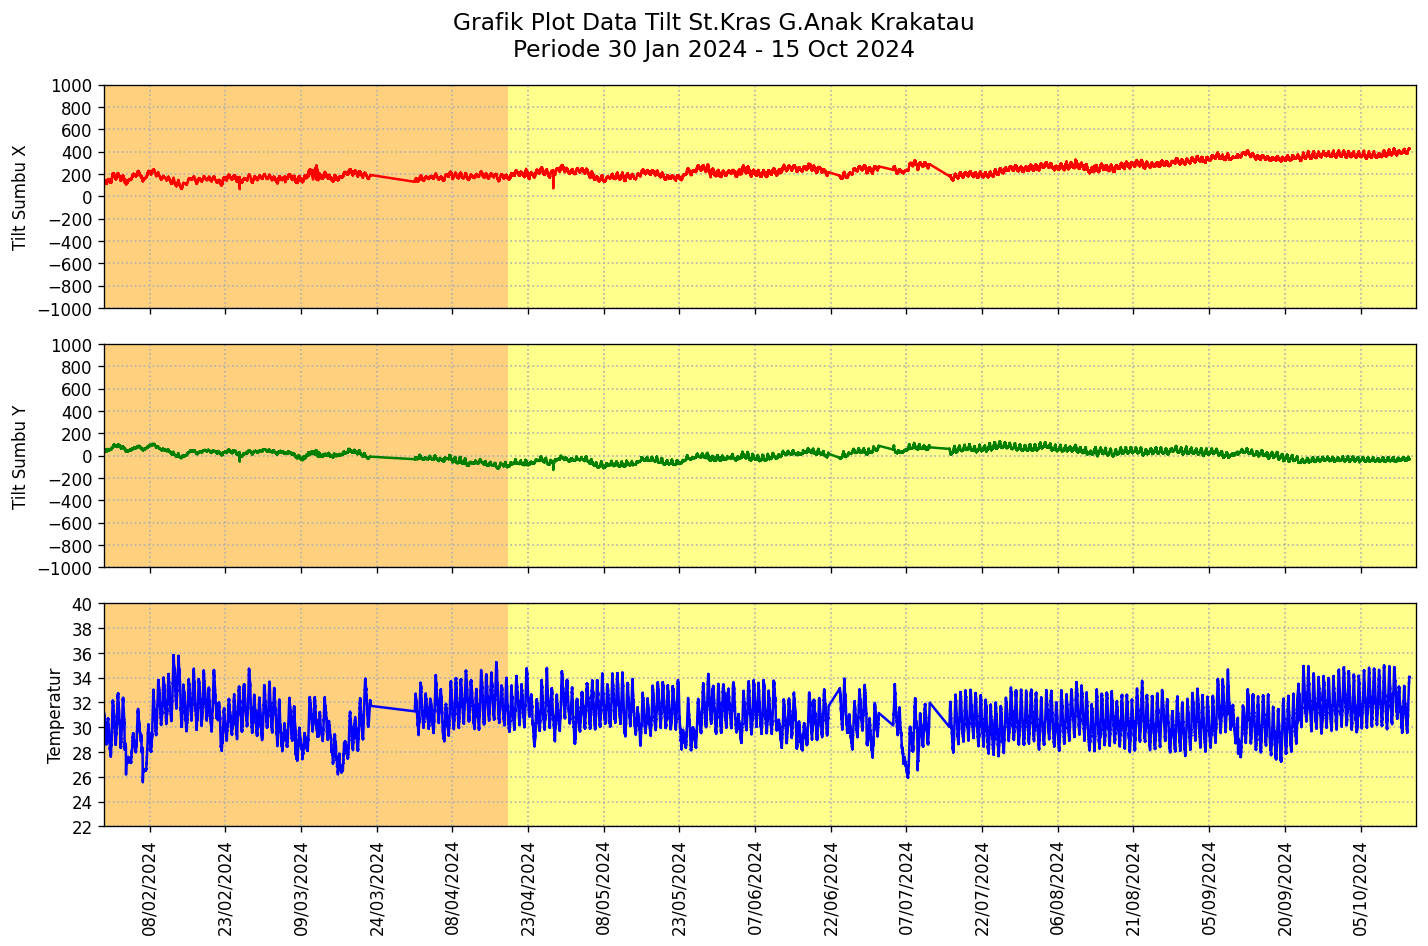

Data Terakhir : 14-Oct-2024 23:35 WIB


In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

df = merged_data
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%d-%m-%Y %H:%M:%S.%f')

def create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp):   
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 8), sharex=True, dpi=120)
    
    # Grafik 1: Nilai sumbu X, tidak ada yang perlu diubah
    ax1.plot(df['DateTime'], df['TiltX'] * 17453.292519943, color='red')
    ax1.set_ylabel('Tilt Sumbu X')
    ax1.set_ylim(range_tiltX[0], range_tiltX[1])
    ax1.yaxis.set_ticks(range(range_tiltX[0], range_tiltX[1] + 1, axis_interval_tiltX))
    ax1.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax1.xaxis.grid(True, linestyle='dotted', linewidth=1)
    
    # Grafik 2: Nilai sumbu Y, tidak ada yang perlu diubah
    ax2.plot(df['DateTime'], df['TiltY'] * 17453.292519943, color='green')
    ax2.set_ylabel('Tilt Sumbu Y')
    ax2.set_ylim(range_tiltY[0], range_tiltY[1])
    ax2.yaxis.set_ticks(range(range_tiltY[0], range_tiltY[1] + 1, axis_interval_tiltY))
    ax2.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax2.xaxis.grid(True, linestyle='dotted', linewidth=1)
    
    # Grafik 3: Nilai Suhu, tidak ada yang perlu diubah
    ax3.plot(df['DateTime'], df['Temp'], color='blue')
    ax3.set_ylabel('Temperatur')
    ax3.set_ylim(range_temp[0], range_temp[1])
    ax3.yaxis.set_ticks(range(range_temp[0], range_temp[1] + 1, axis_interval_temp))
    ax3.yaxis.grid(True, linestyle='dotted', linewidth=1)
    ax3.xaxis.grid(True, linestyle='dotted', linewidth=1)
    
    # Interval tanggal pada grafik
    days = mdates.DayLocator(interval=interval_hari)
    ax3.xaxis.set_major_locator(days)
    date_formatter = DateFormatter('%d/%m/%Y')
    ax3.xaxis.set_major_formatter(date_formatter)
    plt.xticks(rotation=90)
    end_date += timedelta(days=1)
    ax3.set_xlim(start_date, end_date)
    end_date -= timedelta(days=1)
    
    title = f'Grafik Plot Data Tilt St.{stasiun} G.{gunung}\nPeriode {start_date.strftime("%d %b %Y")} - {end_date.strftime("%d %b %Y")}'
    
    plt.suptitle(title, fontsize=14)
    
    def normal(start, end):
        ax1.axvspan(start, end, facecolor='lime', alpha=0.35)
        ax2.axvspan(start, end, facecolor='lime', alpha=0.35)
        ax3.axvspan(start, end, facecolor='lime', alpha=0.35)
    
    def waspada(start, end):
        ax1.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax2.axvspan(start, end, facecolor='yellow', alpha=0.45)
        ax3.axvspan(start, end, facecolor='yellow', alpha=0.45)
    
    def siaga(start, end):
        ax1.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax2.axvspan(start, end, facecolor='orange', alpha=0.5)
        ax3.axvspan(start, end, facecolor='orange', alpha=0.5)
    
    def awas(start, end):
        ax1.axvspan(start, end, facecolor='red', alpha=0.55)
        ax2.axvspan(start, end, facecolor='red', alpha=0.55)
        ax3.axvspan(start, end, facecolor='red', alpha=0.55)
    
    # Memberi warna background sesuai status, ganti tanggal perubahan status sesuai histori, hapus/comment baris yang tidak perlu
    # normal(pd.to_datetime('02/05/2023', format='%d/%m/%Y'), pd.to_datetime('19/12/2023', format='%d/%m/%Y'))
    waspada(pd.to_datetime('19/04/2024', format='%d/%m/%Y'), pd.to_datetime('30/06/2030', format='%d/%m/%Y'))
    siaga(pd.to_datetime('19/04/2023', format='%d/%m/%Y'), pd.to_datetime('19/04/2024', format='%d/%m/%Y'))
    # awas(pd.to_datetime('21/07/2023', format='%d/%m/%Y'), pd.to_datetime('31/07/2023', format='%d/%m/%Y'))

    plt.tight_layout()
    plt.show()

# Tanggal awal dan akhir plot
start_date = pd.to_datetime(waktu_awal, format='%d/%m/%Y')
end_date = pd.to_datetime(waktu_akhir, format='%d/%m/%Y')

# Input rentang dan interval pada sumbu y sesuai kebutuhan, range untuk nilai minimum dan maksimum, interval untuk interval
minimum_suhu = 22
maksimum_suhu = 40
interval_suhu = 2

minimum_sumbu_X = -1000
maksimum_sumbu_X = 1000
interval_sumbu_X = 200

minimum_sumbu_Y = -1000
maksimum_sumbu_Y = 1000
interval_sumbu_Y = 200

range_temp = (minimum_suhu, maksimum_suhu)
axis_interval_temp = interval_suhu

range_tiltX = (minimum_sumbu_X, maksimum_sumbu_X)
axis_interval_tiltX = interval_sumbu_X

range_tiltY = (minimum_sumbu_Y, maksimum_sumbu_Y)
axis_interval_tiltY = interval_sumbu_Y

create_plots(df, start_date, end_date, range_temp, range_tiltX, range_tiltY, axis_interval_tiltX, axis_interval_tiltY, axis_interval_temp)

last_row = merged_data.iloc[-1]
timestamp_terakhir = last_row['DateTime']
utc7 = timestamp_terakhir + pd.Timedelta(hours=7)
wib_time = utc7.strftime('%d-%b-%Y %H:%M')
print("Data Terakhir :", wib_time, "WIB")

# @mukijo, 2023
# 0856-4334-6785